In [29]:
#SOURCE: https://github.com/JosephLahiru/coppeliasim-python/tree/main/Part%2003/model_creation

import numpy as np

data=np.load('ModelData/data.npy')
target=np.load('ModelData/target.npy')
data.shape[1:]

# Convert one-hot labels to integers
labels_int = np.argmax(target, axis=1)

# Count samples per class
classes, counts = np.unique(labels_int, return_counts=True)
print("Class distribution:", dict(zip(classes, counts)))

Class distribution: {np.int64(0): np.int64(235), np.int64(1): np.int64(235), np.int64(2): np.int64(234)}


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow import keras

early_stop = EarlyStopping(
    monitor='val_loss',       # You can also monitor 'val_accuracy'
    patience=15,              # Stop after 15 epochs with no improvement
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.4,               # Reduce learning rate by 0.4
    patience=10,               # Wait 10 epochs before reducing
    min_lr=1e-6,              # Don't go below this learning rate
    verbose=1
)

model = Sequential()

# Convolutional Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=data.shape[1:]))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Convolutional Block 2
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Global Pooling instead of Flatten
model.add(GlobalAveragePooling2D())

# Fully Connected Layers with Regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(target.shape[1], activation='softmax'))

#Set learing rate
optimiser = keras.optimizers.Adam(learning_rate=0.0001)

# Compile
model.compile(loss='categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])

# Summary
model.summary()

/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 64, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 64, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 128, 64, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 64, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,931 (488.01 KB)

 Trainable params: 124,547 (486.51 KB)

 Non-trainable params: 384 (1.50 KB)

In [31]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.15)

In [32]:

# Convert one-hot encoded labels to class indices
y_integers = np.argmax(train_target, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_integers),
    y=y_integers
)

# Convert to dictionary format
class_weights_dict = dict(enumerate(class_weights))

history = model.fit(
    train_data,
    train_target,
    validation_data=(test_data, test_target),
    epochs=200,
    callbacks=[early_stop,reduce_lr],
    class_weight = class_weights_dict
)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.3595 - loss: 1.5635 - val_accuracy: 0.3679 - val_loss: 1.3612 - learning_rate: 2.5000e-04
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.3930 - loss: 1.3813 - val_accuracy: 0.2453 - val_loss: 1.3533 - learning_rate: 2.5000e-04
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.3746 - loss: 1.3554 - val_accuracy: 0.2453 - val_loss: 1.3505 - learning_rate: 2.5000e-04
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.3846 - loss: 1.3376 - val_accuracy: 0.2453 - val_loss: 1.3476 - learning_rate: 2.5000e-04
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.4197 - loss: 1.3102 - val_accuracy: 0.2453 - val_loss: 1.3453 - learning_rate: 2.5000e-04
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.3913 - loss: 1.2963 - val_accuracy: 0.2453 - val_loss: 1.3485 - learning_rate: 2.5000e-04
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - acc

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        39
           2       0.25      1.00      0.39        26

    accuracy                           0.25       106
   macro avg       0.08      0.33      0.13       106
weighted avg       0.06      0.25      0.10       106

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

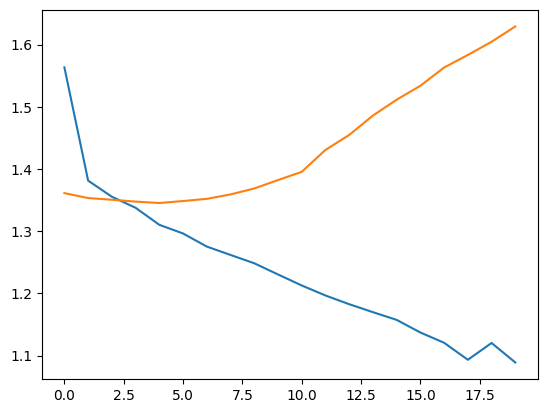

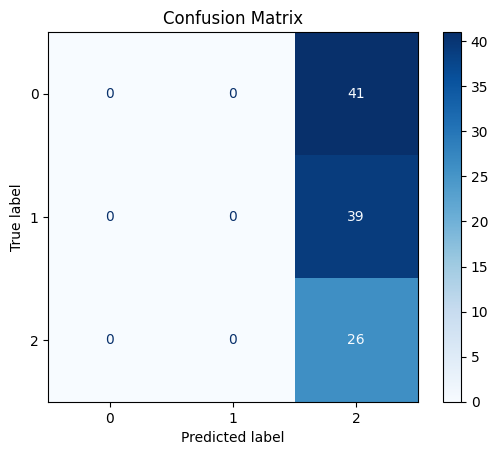

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Plot performance
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#Plot per-class accuracy
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_target, axis=1)
print(classification_report(y_true, y_pred_classes))

#Make confusion matrix
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_target, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



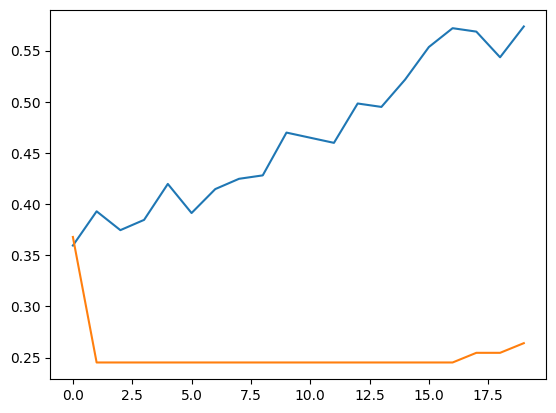

In [34]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:


accc = model.evaluate(test_data,test_target)
print(accc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2453 - loss: 1.3453
[1.3452898263931274, 0.24528302252292633]


In [36]:
modelName = "Models/Model" + str(round(accc[1],4)) + ".h5"
model.save(modelName)